In [1]:
import os

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.dpi'] = 200

In [2]:
# Load experiment results
n_procs = list(range(1,7))
n_iters = [10, 100, 1000]
exp_dir = os.path.join("pickle", "rand_l10_w6_n1000")
exp_names = [f"np{np}.pkl" for np in n_procs]
exp_list = []
for i, np in enumerate(n_procs):
    with open(os.path.join(exp_dir, exp_names[i]), "rb") as f:
        exp_list.append(pickle.load(f))

In [3]:
# Get best times for each # procs
base_time = exp_list[0]["results"]["best_times"][-1]
best_times_dict = {n_iter: [exp_dict["results"]["best_times"][n_iter-1] for exp_dict in exp_list] for n_iter in n_iters}

Text(0, 0.5, 'Speedup')

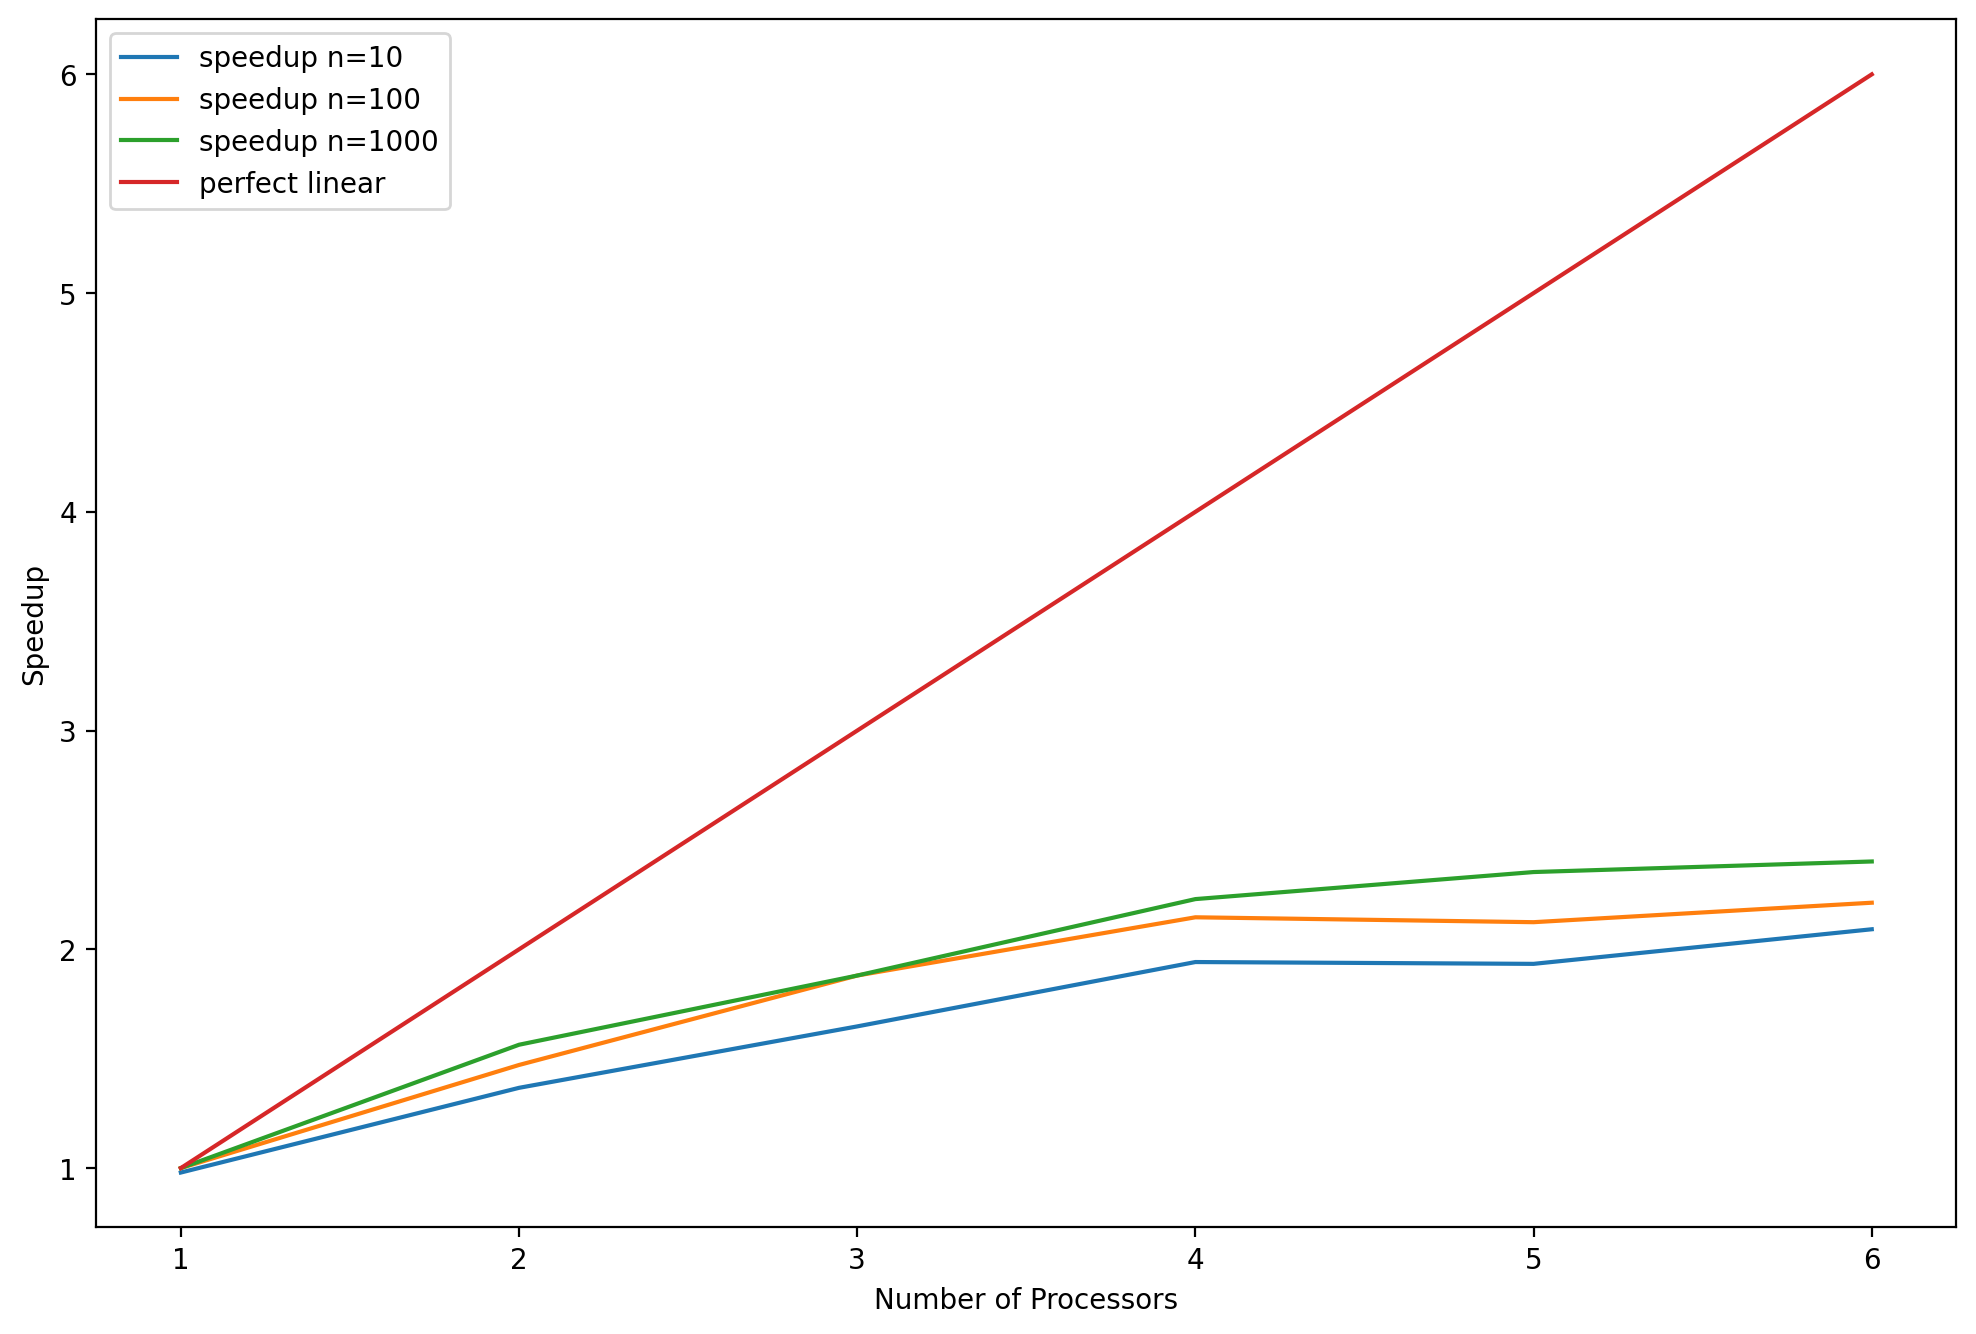

In [4]:
# Plot speedup
for n_iter, best_times in best_times_dict.items():
    speedups = [base_time/best_times[i] for i in range(len(best_times))]
    plt.plot(range(1, len(speedups)+1), speedups, label=f"speedup n={n_iter}")
plt.plot(range(1, len(speedups)+1), range(1, len(speedups)+1), label="perfect linear")
plt.legend(loc="best")
plt.xlabel("Number of Processors")
plt.ylabel("Speedup")
# plt.savefig("speedup.png", dpi=200)